![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/46.1.Multi_Modal_LLMs.ipynb)

### Practical Prompting Examples #1

## Colab Setup

In [ ]:
import json, os
from google.colab import files

if 'spark_jsl.json' not in os.listdir():
  license_keys = files.upload()
  os.rename(list(license_keys.keys())[0], 'spark_jsl.json')

with open('spark_jsl.json') as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)
os.environ.update(license_keys)

In [ ]:
# Installing pyspark and spark-nlp
! pip install --upgrade -q pyspark==3.5.1 spark-nlp==$PUBLIC_VERSION

# Installing Spark NLP Healthcare
! pip install --upgrade -q spark-nlp-jsl==$JSL_VERSION  --extra-index-url https://pypi.johnsnowlabs.com/$SECRET

# Installing Spark NLP Display Library for visualization
! pip install -q spark-nlp-display

In [1]:
import json
import os

import sparknlp
import sparknlp_jsl

from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp_jsl.annotator import *

from pyspark.ml import Pipeline,PipelineModel
from pyspark.sql import SparkSession

import warnings
warnings.filterwarnings('ignore')

params = {
    "spark.driver.memory":"100G",
    "spark.kryoserializer.buffer.max":"2000M",
    "spark.driver.maxResultSize":"2000M",
}

spark = sparknlp_jsl.start('6.1.1-xyz',
                           params=params,
                           #gpu=True # if you have GPU
                           )

print("Spark NLP Version :", sparknlp.version())
print("Spark NLP_JSL Version :", sparknlp_jsl.version())

spark

25/10/23 13:03:11 WARN Utils: Your hostname, jose-LOQ-15ARP9 resolves to a loopback address: 127.0.1.1; using 192.168.0.20 instead (on interface wlo1)
25/10/23 13:03:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/jose/spark-ocr/sparkocr/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/jose/.ivy2/cache
The jars for the packages stored in: /home/jose/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-4d63bc03-40af-4a86-815f-cd1047d422b5;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;6.1.3 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.12.500 in central
	f

Spark NLP Version : 6.1.3
Spark NLP_JSL Version : 6.1.1


 # MedicalVisionLLM

**` MedicalVisionLLM`** is a groundbreaking addition to our model lineup that enhances the capabilities of large language models with visual understanding. This model is designed to process and analyze both text and images, making it ideal for tasks that require a comprehensive understanding of multimodal data. The **`MedicalVisionLLM`** is built on the latest advancements in multimodal AI, allowing it to interpret and generate responses based on visual inputs alongside textual information.

# Model List

| **Model Name**             | **Quantization Options**   | **Description**   |
| -------------------------- | -------------------------- | ----------------- |
| JSL_MedS_NER_VLM_3B_v1         | [q4](https://nlp.johnsnowlabs.com/2025/08/08/jsl_meds_vlm_3b_q8_v1_en.html), [q8](https://nlp.johnsnowlabs.com/2025/08/08/jsl_meds_vlm_3b_q4_v1_en.html), [q16](https://nlp.johnsnowlabs.com/2025/08/08/jsl_meds_vlm_3b_q16_v1_en.html) | Extract and link structured medical named entities |
| JSL_MedS_VLM_2B_v1         | [q4](https://nlp.johnsnowlabs.com/2025/08/08/jsl_meds_ner_vlm_2b_q4_v1_en.html), [q8](https://nlp.johnsnowlabs.com/2025/08/10/jsl_meds_ner_vlm_2b_q8_v1_en.html), [q16](https://nlp.johnsnowlabs.com/2025/08/10/jsl_meds_ner_vlm_2b_q16_v1_en.html) | Extract and link structured medical named entities |
| JSL_MedS_NER_VLM_2B_v2         | [q4](https://nlp.johnsnowlabs.com/2025/08/10/jsl_meds_ner_vlm_2b_q4_v2_en.html), [q8](https://nlp.johnsnowlabs.com/2025/08/10/jsl_meds_ner_vlm_2b_q8_v2_en.html), [q16](https://nlp.johnsnowlabs.com/2025/08/10/jsl_meds_ner_vlm_2b_q16_v2_en.html) | Extract and link structured medical named entities |
| JSL_MEDS_NER_VLM_8B_v1     | [q4](https://nlp.johnsnowlabs.com/2025/08/27/jsl_meds_ner_vlm_8b_q4_v1_en.html), [q8](https://nlp.johnsnowlabs.com/2025/08/27/jsl_meds_ner_vlm_8b_q8_v1_en.html), [q16](https://nlp.johnsnowlabs.com/2025/08/27/jsl_meds_ner_vlm_8b_q16_v1_en.html) | Extract and link structured medical named entities |
| JSL_MEDS_NER_VLM_7B_v1     | [q4](https://nlp.johnsnowlabs.com/2025/09/16/jsl_meds_ner_vlm_7b_q4_v1_en.html), [q8](https://nlp.johnsnowlabs.com/2025/09/16/jsl_meds_ner_vlm_7b_q8_v1_en.html), [q16](https://nlp.johnsnowlabs.com/2025/09/16/jsl_meds_ner_vlm_7b_q16_v1_en.html) | Extract and link structured medical named entities |

# Example Data

In [4]:
!mkdir -p images

!wget -O images/prescription.png  -q "https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/healthcare-nlp/data/ocr/prescription_02.png"


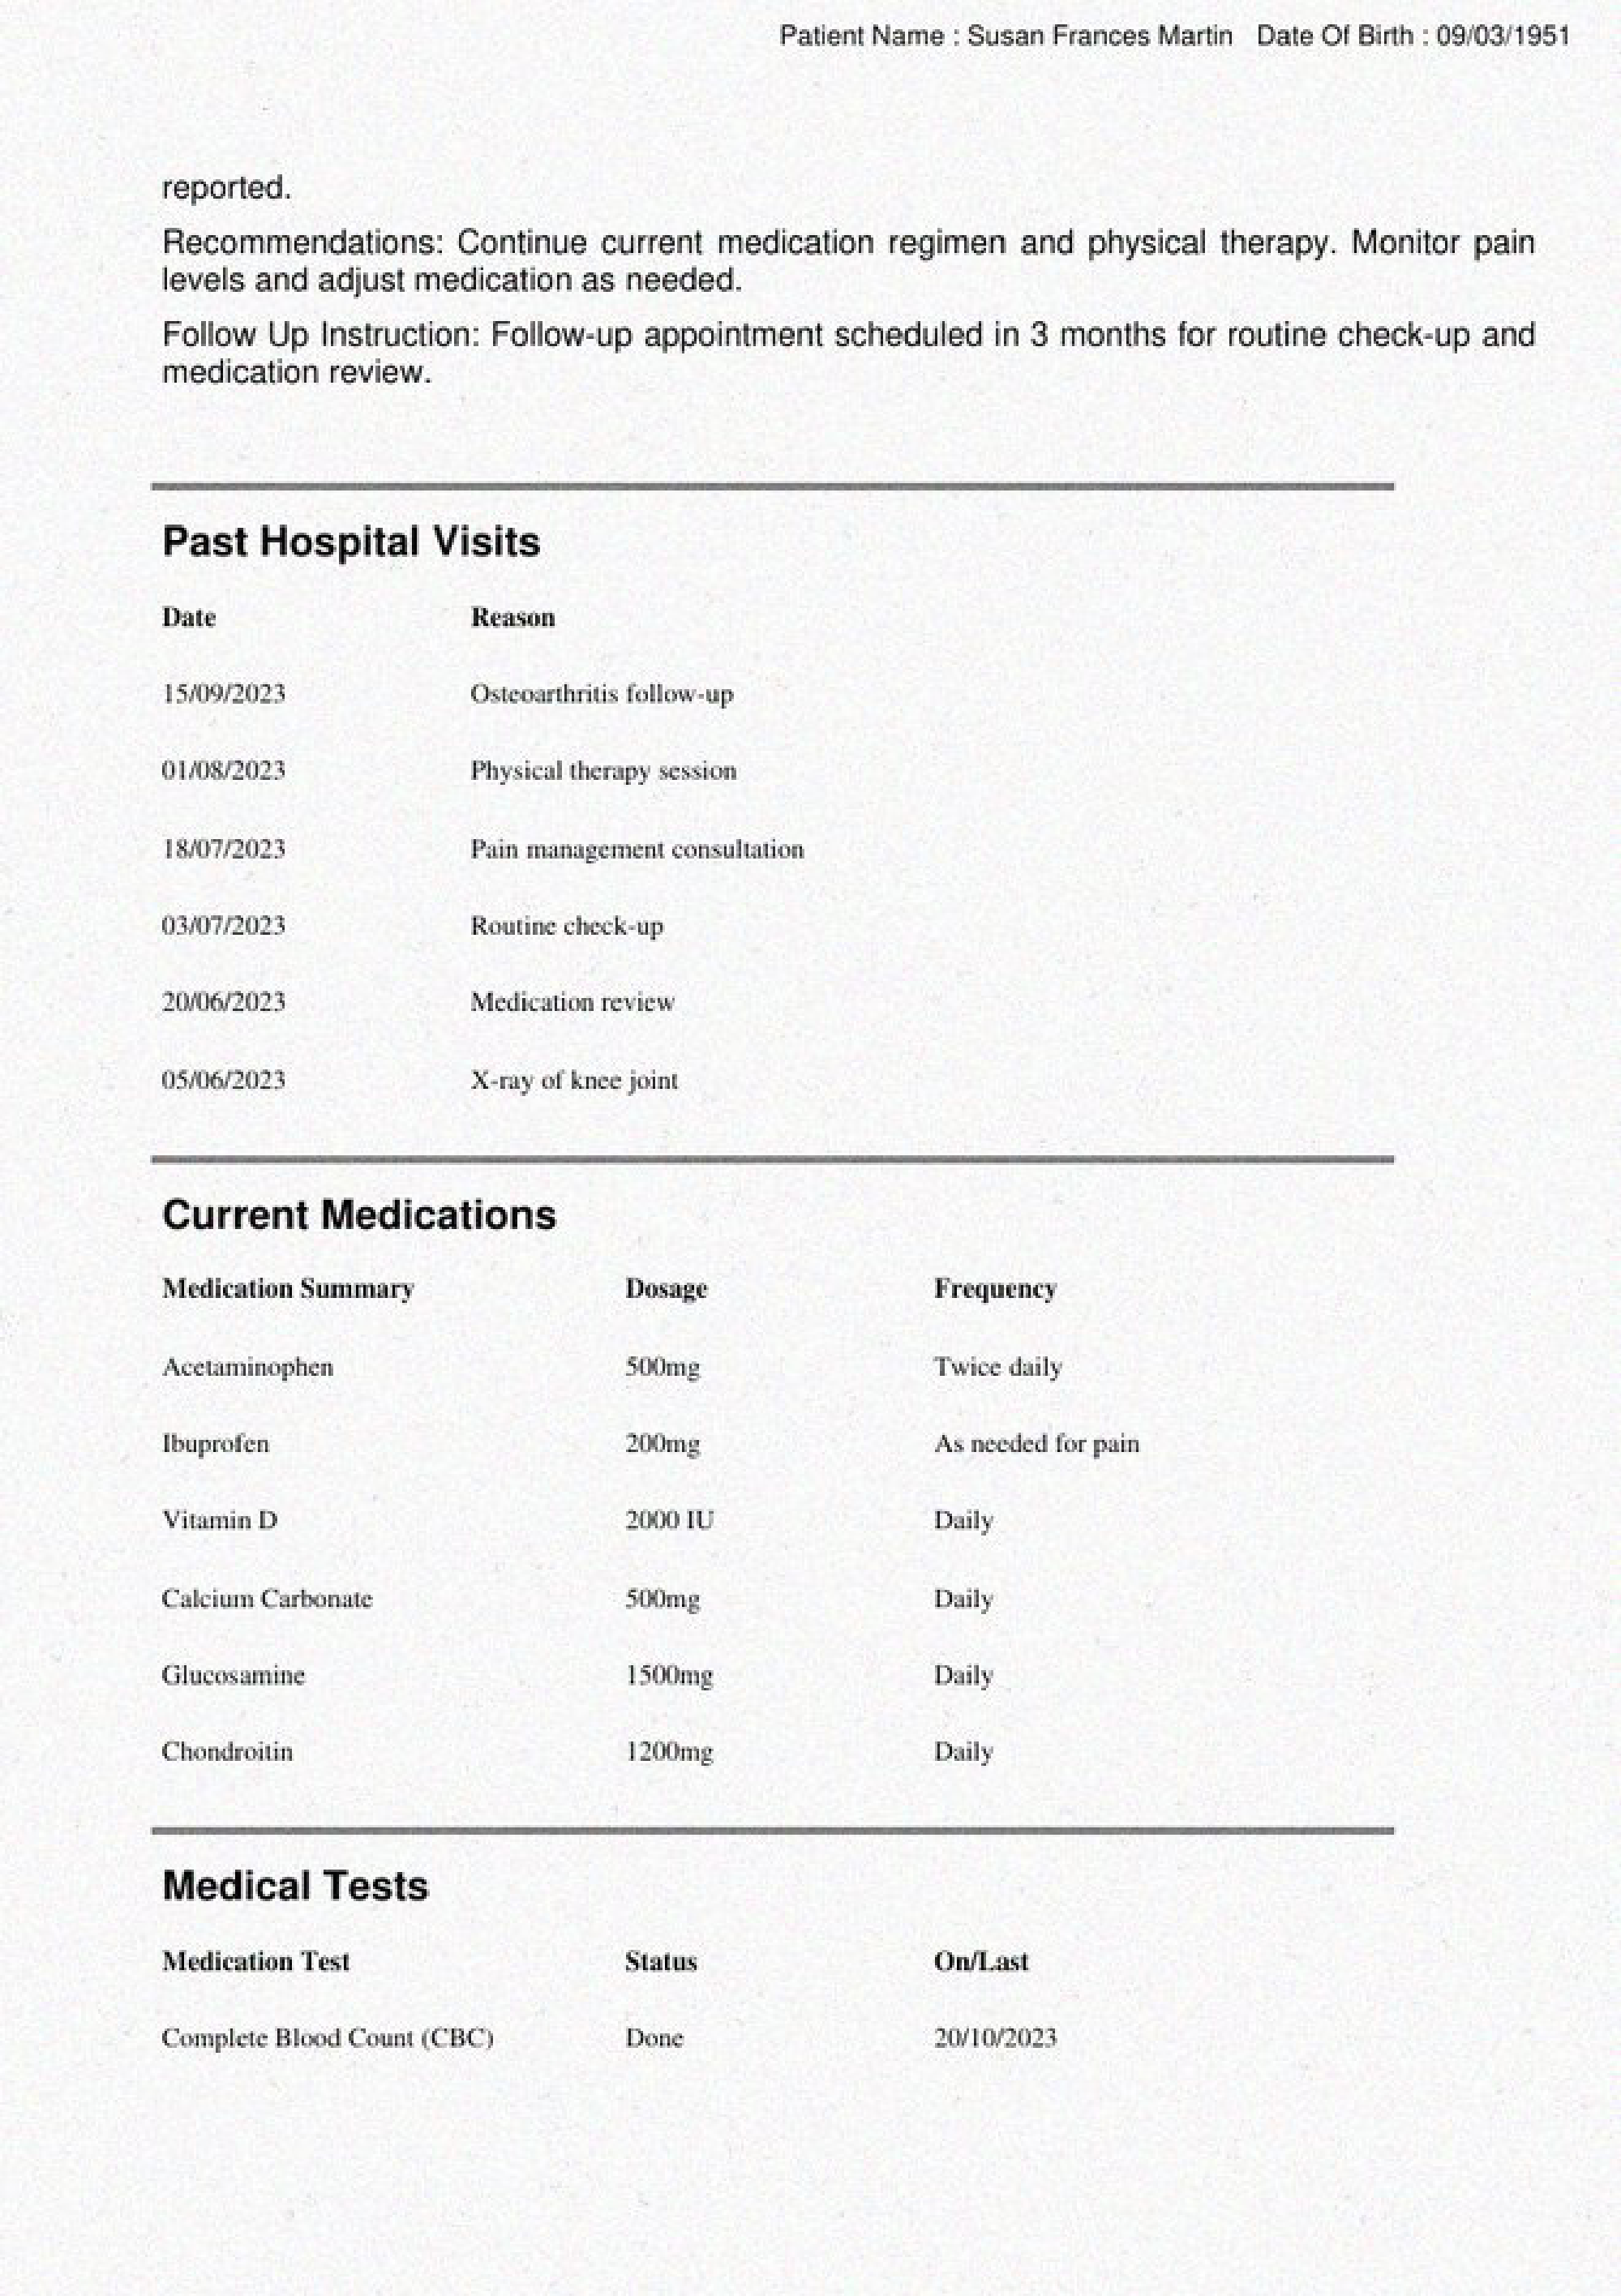

In [2]:
from IPython.display import Image, display

display(Image(filename="./images/med_list.png"))

# Vision LLMs

## JSL_MedS_VLM_3B_v1

In [3]:
from sparknlp_jsl.utils import *

prompt = """Extract medication information, as a list including dosage and frequency."""

input_df = vision_llm_preprocessor(
    spark=spark,
    images_path="./images/med_list.png",
    prompt=prompt,
    output_col_name="prompt"
)
input_df.show()

+--------------------+--------------------+--------------------+-------+--------------------+--------------------+
|               image|                path|    modificationTime| length|             content|              prompt|
+--------------------+--------------------+--------------------+-------+--------------------+--------------------+
|{file:/home/jose/...|file:/home/jose/s...|2025-10-23 11:45:...|1563593|[89 50 4E 47 0D 0...|Extract medicatio...|
+--------------------+--------------------+--------------------+-------+--------------------+--------------------+



In [4]:
document_assembler = DocumentAssembler()\
    .setInputCol("prompt")\
    .setOutputCol("document")

image_assembler = ImageAssembler()\
    .setInputCol("image")\
    .setOutputCol("image_assembler")

medical_vision_llm = MedicalVisionLLM.pretrained("jsl_meds_vlm_3b_q8_v1", "en", "clinical/models")\
    .setInputCols(["document", "image_assembler"])\
    .setOutputCol("completions")\
    .setChatTemplate("")\
    .setBatchSize(4)\
    .setNGpuLayers(99)\
    .setNCtx(4096)\
    .setNPredict(512)\
    .setTemperature(0.0)\
    .setTopK(1)\
    .setTopP(1)\
    .setRepeatLastN(256)\
    .setRepeatPenalty(1.1)\
    .setStopStrings(["</s>", "User:", "<|im_start|>"])


pipeline = Pipeline().setStages([
    document_assembler,
    image_assembler,
    medical_vision_llm
])


jsl_meds_vlm_3b_q8_v1 download started this may take some time.
Approximate size to download 3.6 GB
[ | ]

25/10/23 13:03:43 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
25/10/23 13:03:44 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


jsl_meds_vlm_3b_q8_v1 download started this may take some time.
Approximate size to download 3.6 GB
Download done! Loading the resource.
Extracted 'libjllama.so' to '/tmp/libjllama.so'
[ — ]

25/10/23 13:03:48 WARN SparkContext: The path /home/jose/cache_pretrained/jsl_meds_vlm_3b_q8_v1_en_6.1.0_3.0_1754686030561/69e628_model.gguf has been added already. Overwriting of added paths is not supported in the current version.
25/10/23 13:03:48 WARN SparkContext: The path /home/jose/cache_pretrained/jsl_meds_vlm_3b_q8_v1_en_6.1.0_3.0_1754686030561/mmproj_69e628_model.gguf has been added already. Overwriting of added paths is not supported in the current version.


[OK!]


In [5]:
%%time
result = pipeline.fit(input_df).transform(input_df).cache()

CPU times: user 8.26 ms, sys: 5.15 ms, total: 13.4 ms
Wall time: 548 ms


In [6]:
%%time
collectted_result = result.select("completions.result").collect()

clip_model_loader: model name:   Downloaded_Model                   (0 + 1) / 1]
clip_model_loader: description:  
clip_model_loader: GGUF version: 3
clip_model_loader: alignment:    32
clip_model_loader: n_tensors:    519
clip_model_loader: n_kv:         20

clip_model_loader: has vision encoder
clip_ctx: CLIP using CPU backend
load_hparams: projector:          qwen2.5vl_merger
load_hparams: n_embd:             1280
load_hparams: n_head:             16
load_hparams: n_ff:               3420
load_hparams: n_layer:            32
load_hparams: ffn_op:             silu
load_hparams: projection_dim:     2048

--- vision hparams ---
load_hparams: image_size:         1024
load_hparams: patch_size:         14
load_hparams: has_llava_proj:     0
load_hparams: minicpmv_version:   0
load_hparams: proj_scale_factor:  0
load_hparams: n_wa_pattern:       8

load_hparams: model size:         805.59 MiB
load_hparams: metadata size:      0.18 MiB
alloc_compute_meta:        CPU compute buffer size =   

CPU times: user 17.5 ms, sys: 8.97 ms, total: 26.4 ms
Wall time: 54.9 s


In [7]:
for res in collectted_result:
    print("****"*10)
    print(res[0][0])

****************************************
Here is the extracted medication information from the provided document:

1. **Acetaminophen**
   - Dosage: 500mg
   - Frequency: Twice daily

2. **Ibuprofen**
   - Dosage: 200mg
   - Frequency: Daily

3. **Calcium Carbonate**
   - Dosage: 500mg
   - Frequency: As needed for pain

4. **Vitamin D**
   - Dosage: 2000 IU
   - Frequency: Daily

5. **Glucosamine**
   - Dosage: 1500mg
   - Frequency: Daily

6. **Chondroitin**
   - Dosage: 1200mg
   - Frequency: Daily

These medications are being taken on a regular basis to manage symptoms related to osteoarthritis.


## Another Prompt #1

In [8]:
prompt = """Extract medication information, as a list including dosage and frequency. Don't include any additional comment"""

input_df = vision_llm_preprocessor(
    spark=spark,
    images_path="./images/med_list.png",
    prompt=prompt,
    output_col_name="prompt"
)

result = pipeline.fit(input_df).transform(input_df).cache()
collected_result = result.select("completions.result").collect()

for res in collected_result:
    print("****"*10)
    print(res[0][0])

[Stage 7:>                                                          (0 + 1) / 1]

****************************************
- Acetaminophen: 500mg; Twice daily
- Ibuprofen: 200mg; As needed for pain
- Vitamin D: 1500IU; Daily
- Calcium Carbonate: 500mg; As needed for bone health
- Glucosamine: 1500mg; Daily
- Chondroitin: 1200mg; Daily


## Another prompt #2

In [12]:
prompt = """Extract medication information, as a list including dosage and frequency. Don't include any additional comment.
Include only text that is present in the image."""

input_df = vision_llm_preprocessor(
    spark=spark,
    images_path="./images/med_list.png",
    prompt=prompt,
    output_col_name="prompt"
)

result = pipeline.fit(input_df).transform(input_df).cache()
collected_result = result.select("completions.result").collect()

for res in collected_result:
    print("****"*10)
    print(res[0][0])

[Stage 15:>                                                         (0 + 1) / 1]

****************************************
- Acetaminophen: 500mg; Twice daily
- Ibuprofen: 200mg; As needed for pain
- Vitamin D: 1500IU; Daily
- Calcium Carbonate: 500mg; As needed for bone health
- Glucosamine: 1500mg; Daily
- Chondroitin: 1200mg; Daily


## Another Prompt #3

In [9]:
from sparknlp_jsl.utils import *

prompt = """Extract medication information, as a list including dosage and frequency. Don't include any additional comment.
Include only text that is present in the image.
Frequency can only come from the following list:["Twice daily", "Daily", "As needed for pain"]."""

input_df = vision_llm_preprocessor(
    spark=spark,
    images_path="./images/med_list.png",
    prompt=prompt,
    output_col_name="prompt"
)

result = pipeline.fit(input_df).transform(input_df).cache()
collected_result = result.select("completions.result").collect()

for res in collected_result:
    print("****"*10)
    print(res[0][0])

[Stage 10:>                                                         (0 + 1) / 1]

****************************************
- Acetaminophen: 500mg; Twice daily
- Ibuprofen: 200mg; As needed for pain
- Vitamin D: 1500IU; Daily
- Calcium Carbonate: 500mg; Daily
- Glucosamine: 1200mg; Daily
- Chondroitin: 2000IU; Daily
